In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
Red = pd.read_csv("Red_mag.csv",sep=',',header=None,names=['Name','mag'])
IR = pd.read_csv("IR_mag.csv",sep=',',header=None,names=['Name','mag'])
Green = pd.read_csv("Green_mag.csv",sep=',',header=None,names=['Name','mag'])

In [3]:
# m0r = 8.47
# Red['mag'] = m0r - 2.5*np.log10(Red['rel_flux'])

# m0g = 9.463988
# Green['mag'] = m0g - 2.5*np.log10(Green['rel_flux'])

In [4]:
print(len(Green['mag']),len(IR['mag']))

148 148


(array([ 6.,  8., 10., 12., 14., 16., 18., 20., 22.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

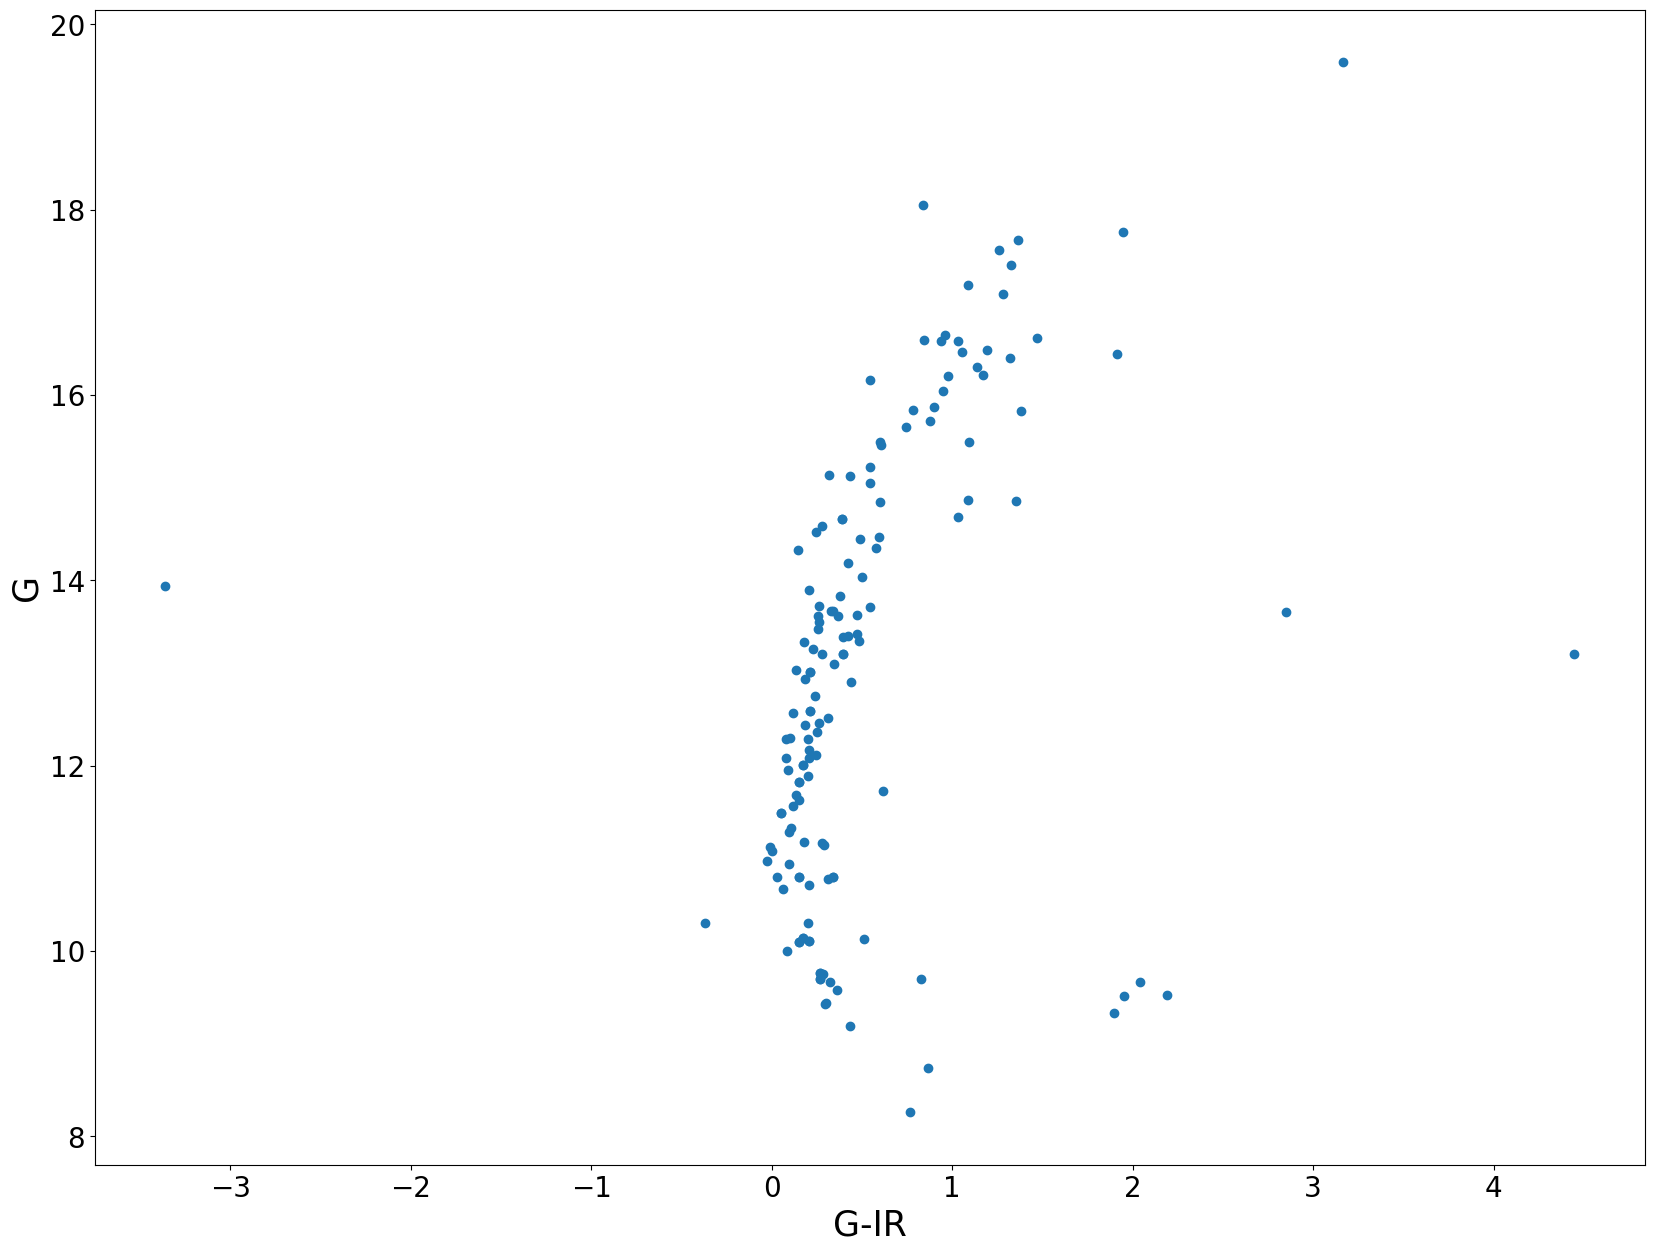

In [5]:
fig = plt.figure(figsize=(20,15))
plt.scatter(Green['mag']-IR['mag'],Green['mag'])
plt.xlabel(r"G-IR", fontsize=25)
plt.ylabel(r"G", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [6]:
dif = -IR['mag']+Green['mag']
dif.to_csv("color.csv")

In [7]:
IR['mag']

0       9.461290
1       9.494601
2      10.462711
3       9.921693
4       9.901542
         ...    
143    16.101420
144    17.215762
145    16.071801
146    14.526872
147     7.621057
Name: mag, Length: 148, dtype: float64

In [8]:
Green.to_csv("green_buono_prova.csv")

In [9]:
import bokeh
from bokeh.io import output_notebook, show, output_file, curdoc
from bokeh.layouts import gridplot
from bokeh.plotting import figure
from bokeh.layouts import column
from bokeh.models import Slider
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Range1d
output_notebook()

Loading BokehJS ...

In [10]:
TOOLS = "crosshair,pan,tap,wheel_zoom,box_zoom,box_select,lasso_select,reset,save,hover"

kwargs = {'selection_fill_color':'steelblue', 
          'selection_line_color': 'steelblue',
          'nonselection_fill_color': 'silver', 
          'nonselection_line_color': 'silver'}

first = figure(tools=TOOLS, plot_width=400, plot_height=400,title='')

first.circle(-IR['mag']+Green['mag'], Green['mag'], **kwargs)
first.y_range = Range1d(20,7)
#first.y_range = Range1d(18,7)
first.x_range = Range1d(-0.5,3)
first.xaxis.axis_label = 'G - IR'
first.yaxis.axis_label = 'G'


second = figure(tools=TOOLS, plot_width=400, plot_height=400, title='')

second.square(-Red['mag']+Green['mag'], Green['mag'], color="#d95b43")
second.y_range = Range1d(20, 7)
#second.y_range = Range1d(20, 7.5)
second.x_range = Range1d(-0.5,2.5)
second.xaxis.axis_label = 'G - R'
second.yaxis.axis_label = 'G'


third = figure(tools=TOOLS, plot_width=400, plot_height=400, title='')

third.triangle(-IR['mag']+Red['mag'], Red['mag'], color="#a02942")
third.y_range = Range1d(20, 7)
#third.y_range = Range1d(19, 7)
third.x_range = Range1d(-0.5,1.5)
third.xaxis.axis_label = 'R - IR'
third.yaxis.axis_label = 'R'


p = gridplot([[first,second,third]],toolbar_location="below")
curdoc().theme = 'light_minimal'
output_file("bokeh_appendix.html", title="bokeh appendix")
show(p)

from bokeh.io import export_png

export_png(p, filename="plot.png")

RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.